# Clustering of Iris Data

In [ ]:
#sklearn.cluster.KMeans(n_clusters = 8,
#                             init = 'k-means++',
#                           n_init = 10,
#                         max_iter = 300,
#                              tol = 0.0001,
#             precompute_distances = 'auto',
#                          verbose = 0,
#                     random_state = None,
#                           copy_x = True,
#                           n_jobs =-1)

In [1]:
# make sure ipython inline mode is activated
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_iris
from itertools import cycle
import pylab as pl

iris = load_iris()
X = iris.data
y = iris.target

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_jobs=-1)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [12]:
kmeans.cluster_centers_

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ]])

In [13]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [14]:
kmeans.inertia_

78.940841426146079

In [26]:
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
r = 0
for i in range(len(X)):
    if (kmeans.fit_predict(X)[i] == y[i]): r+=1

print(r*100/len(y))

38.0


In [22]:
# all of this is taken from the notebook '03_iris_dimensionality.ipynb' 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimizied.

In [3]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(42)

kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [4]:
import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02, -0.71],
       [ 0.33,  0.89],
       [-1.29, -0.44]])

In [5]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [6]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

The K-means algorithm has been used to infer cluster labels for the
points.  Let's call the ``plot_2D`` function again, but color the points
based on the cluster labels rather than the iris species.

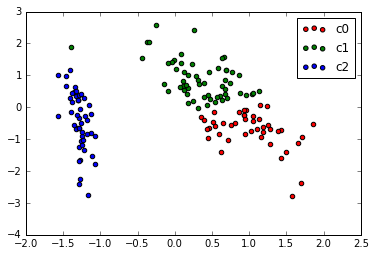

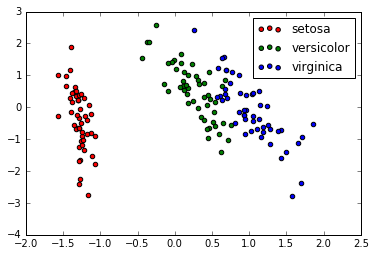

In [7]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

plot_2D(X_pca, iris.target, iris.target_names)

### Exercise

Perform the K-Means cluster search again, but this time learn the
clusters using the full data matrix ``X``, rather than the projected
matrix ``X_pca``.  Does this change the results?  Do these labels
look closer to the true labels?